## Groupe_34_umap

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np

'''
Variables: 
---------

corpus : list of documents
embeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension) 
red_emd : reduced embeddings matrix using dimentionality reduction
k : number of clusters
labels : documents labels
pred : list of clustering predicted clusters 

'''

c:\Users\Azus\Desktop\Projet_Data_engineering\Groupe34_Projet\myvenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'\nVariables: \n---------\n\ncorpus : list of documents\nembeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension) \nred_emd : reduced embeddings matrix using dimentionality reduction\nk : number of clusters\nlabels : documents labels\npred : list of clustering predicted clusters \n\n'

## Importing data

In [3]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))


## Embedding usisng sentence transformers

In [4]:
# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

In [5]:
import numpy as np
from umap import UMAP
import matplotlib.pyplot as plt

def dim_red(mat, p):
    '''
    Perform dimensionality reduction

    Input:
    -----
        mat : NxM list 
        p : number of dimensions to keep 
    Output:
    ------
        red_mat : NxP list such that p<<m
    '''
    
    # Create UMAP model and fit_transform the embeddings to reduce to 20 dimensions
    umap_model = UMAP(n_components=20)
    umap_result = umap_model.fit_transform(embeddings)

    # red_mat = mat[:,:p]
    
    return umap_result

In [6]:
# perform dimentionality reduction
red_emb = dim_red(embeddings, 20)

### perform clustering

In [7]:
from sklearn.cluster import KMeans

def clust(mat, k):
    '''
    Perform clustering

    Input:
    -----
        mat : input list 
        k : number of cluster
    Output:
    ------
        pred : list of predicted labels
    '''
    kmeans = KMeans(n_clusters=20, random_state=42)
    kmeans_labels = kmeans.fit_predict(red_emb)
    
    # pred = np.random.randint(k, size=len(corpus))
    
    return kmeans_labels

In [8]:
# Perform k-means clustering with 20 clusters
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans_labels = kmeans.fit_predict(red_emb)

c:\Users\Azus\Desktop\Projet_Data_engineering\Groupe34_Projet\myvenv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Azus\Desktop\Projet_Data_engineering\Groupe34_Projet\myvenv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Azus\Desktop\Projet_Data_engineering\Groupe34_Projet\myvenv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


## evaluation

In [13]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score

# Evaluate clustering using NMI and ARI
nmi_score = normalized_mutual_info_score(labels, kmeans_labels) #labels is true labels
ari_score = adjusted_rand_score(labels, kmeans_labels)


print(f'Normalized Mutual Information (NMI): {nmi_score:.4f}')
print(f'Adjusted Rand Index (ARI): {ari_score:.4f}')

Normalized Mutual Information (NMI): 0.4764
Adjusted Rand Index (ARI): 0.2962


## umap 2d

In [9]:
umap_model_2d = UMAP(n_components=2)
umap_result_2d = umap_model_2d.fit_transform(embeddings)

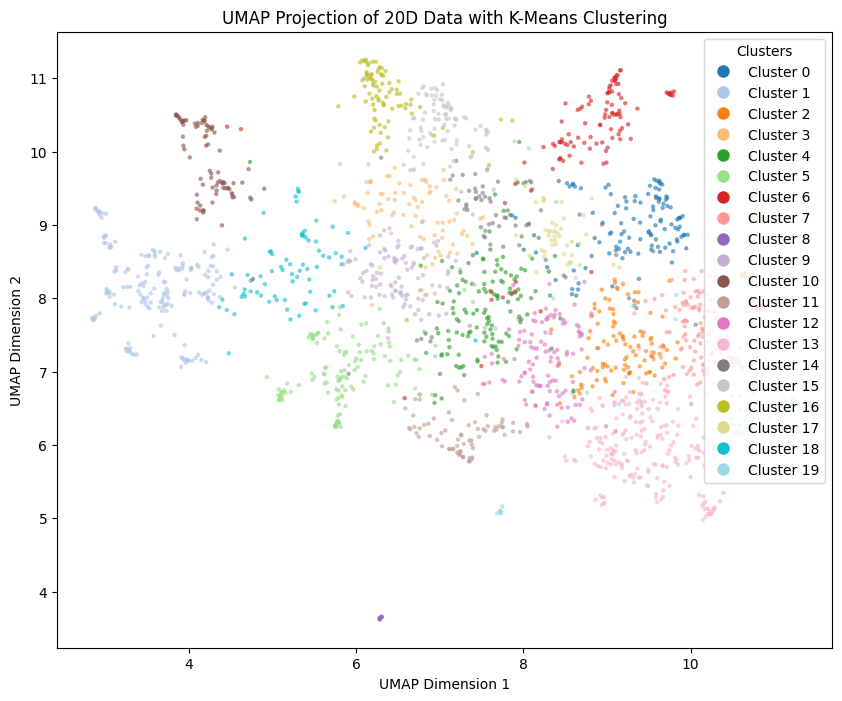

In [10]:
from matplotlib.lines import Line2D


# Increase figure size
plt.figure(figsize=(10, 8))

# Plot the results with distinct colors representing different clusters
scatter = plt.scatter(umap_result_2d[:, 0], umap_result_2d[:, 1], c=kmeans_labels, s=5, cmap='tab20', alpha=0.5)

# Create custom legend handles and labels
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.get_cmap('tab20')(i), markersize=10) for i in range(20)]
legend_labels = [f'Cluster {i}' for i in range(20)]

# Add legend
plt.legend(handles=legend_handles, labels=legend_labels, title='Clusters')

plt.title('UMAP Projection of 20D Data with K-Means Clustering')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

## using plotly

In [12]:
import plotly.express as px


# Create a DataFrame for Plotly
import pandas as pd
df = pd.DataFrame({
    'UMAP Dimension 1': umap_result_2d[:, 0],
    'UMAP Dimension 2': umap_result_2d[:, 1],
    'Cluster': kmeans_labels
})

# Add a 'Cluster' column for legend labels
df['Cluster'] = df['Cluster'].apply(lambda x: f'Cluster {x}')

# Plot using Plotly Express with equal aspect ratio
fig = px.scatter(
    df, x='UMAP Dimension 1', y='UMAP Dimension 2',
    color='Cluster', title='UMAP Projection with K-Means Clustering',
    labels={'UMAP Dimension 1': 'UMAP Dimension 1', 'UMAP Dimension 2': 'UMAP Dimension 2'},
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Set equal aspect ratio
fig.update_layout(scene=dict(aspectmode="data"))

# Show the interactive plot
fig.show()